# Hospital Readmissions Data Analysis and Recommendations for Reduction

### Background
In October 2012, the US government's Center for Medicare and Medicaid Services (CMS) began reducing Medicare payments for Inpatient Prospective Payment System hospitals with excess readmissions. Excess readmissions are measured by a ratio, by dividing a hospital’s number of “predicted” 30-day readmissions for heart attack, heart failure, and pneumonia by the number that would be “expected,” based on an average hospital with similar patients. A ratio greater than 1 indicates excess readmissions.

### Exercise Directions

In this exercise, you will:
+ critique a preliminary analysis of readmissions data and recommendations (provided below) for reducing the readmissions rate
+ construct a statistically sound analysis and make recommendations of your own 

More instructions provided below. Include your work **in this notebook and submit to your Github account**. 

### Resources
+ Data source: https://data.medicare.gov/Hospital-Compare/Hospital-Readmission-Reduction/9n3s-kdb3
+ More information: http://www.cms.gov/Medicare/medicare-fee-for-service-payment/acuteinpatientPPS/readmissions-reduction-program.html
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import bokeh.plotting as bkp
import seaborn as sns
from mpl_toolkits.axes_grid1 import make_axes_locatable

from scipy.stats import spearmanr

In [2]:
# read in readmissions data provided
hospital_read_df = pd.read_csv('data/cms_hospital_readmissions.csv')

****
## Preliminary Analysis

In [3]:
# deal with missing and inconvenient portions of data 
clean_hospital_read_df = hospital_read_df[hospital_read_df['Number of Discharges'] != 'Not Available']
clean_hospital_read_df.loc[:, 'Number of Discharges'] = clean_hospital_read_df['Number of Discharges'].astype(int)
clean_hospital_read_df = clean_hospital_read_df.sort_values('Number of Discharges')

/home/rika/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:537: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


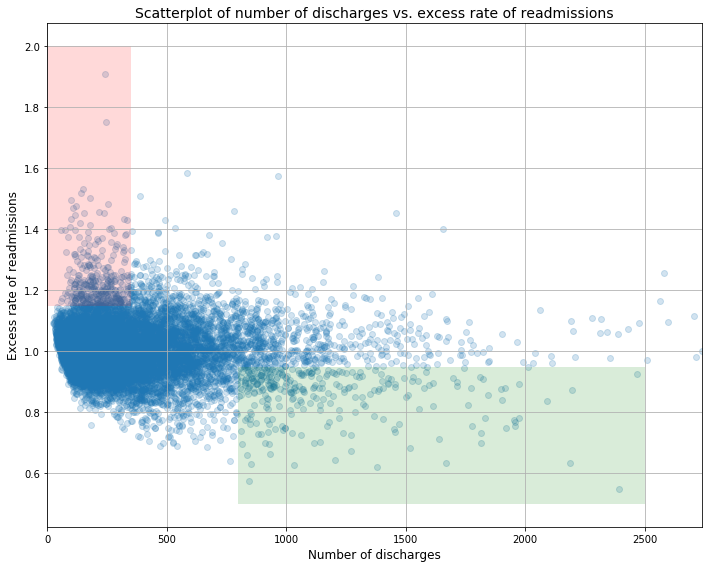

In [4]:
# generate a scatterplot for number of discharges vs. excess rate of readmissions
# lists work better with matplotlib scatterplot function
x = [a for a in clean_hospital_read_df['Number of Discharges'][81:-3]]
y = list(clean_hospital_read_df['Excess Readmission Ratio'][81:-3])

fig, ax = plt.subplots(figsize=(10,8))
ax.scatter(x, y,alpha=0.2)

ax.fill_between([0,350], 1.15, 2, facecolor='red', alpha = .15, interpolate=True)
ax.fill_between([800,2500], .5, .95, facecolor='green', alpha = .15, interpolate=True)

ax.set_xlim([0, max(x)])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)

ax.grid(True)
fig.tight_layout()

****

## Preliminary Report

Read the following results/report. While you are reading it, think about if the conclusions are correct, incorrect, misleading or unfounded. Think about what you would change or what additional analyses you would perform.

**A. Initial observations based on the plot above**
+ Overall, rate of readmissions is trending down with increasing number of discharges
+ With lower number of discharges, there is a greater incidence of excess rate of readmissions (area shaded red)
+ With higher number of discharges, there is a greater incidence of lower rates of readmissions (area shaded green) 

**B. Statistics**
+ In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1 
+ In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1 

**C. Conclusions**
+ There is a significant correlation between hospital capacity (number of discharges) and readmission rates. 
+ Smaller hospitals/facilities may be lacking necessary resources to ensure quality care and prevent complications that lead to readmissions.

**D. Regulatory policy recommendations**
+ Hospitals/facilties with small capacity (< 300) should be required to demonstrate upgraded resource allocation for quality care to continue operation.
+ Directives and incentives should be provided for consolidation of hospitals and facilities to have a smaller number of them with higher capacity and number of discharges.

****
### Exercise

Include your work on the following **in this notebook and submit to your Github account**. 

A. Do you agree with the above analysis and recommendations? Why or why not?
   
B. Provide support for your arguments and your own recommendations with a statistically sound analysis:

   1. Setup an appropriate hypothesis test.
   2. Compute and report the observed significance value (or p-value).
   3. Report statistical significance for $\alpha$ = .01. 
   4. Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?
   5. Look at the scatterplot above. 
      - What are the advantages and disadvantages of using this plot to convey information?
      - Construct another plot that conveys the same information in a more direct manner.



You can compose in notebook cells using Markdown: 
+ In the control panel at the top, choose Cell > Cell Type > Markdown
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

# A 
I do not agree with the above analysis. It assumes that each row of the dataframe contains a unique hospital or facility. This isn't actually the case.

In [5]:
clean_hospital_read_df[81:-3].shape

(11494, 12)

From this, we'd assume that there are 11,578 unique hospitals and facilities. However, this isn't the case at all. 

In [6]:
len(clean_hospital_read_df[81:-3]['Provider Number'].unique()) 

2991

There are actually only 2,991 hospitals represented in the cleaned dataframe used in the analysis above. Looking at a specific case tells us why so few hospitals are duplicated so often:

In [7]:
clean_hospital_read_df[clean_hospital_read_df['Provider Number']==210008]

,Hospital Name,Provider Number,State,Measure Name,Number of Discharges,Footnote,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions,Start Date,End Date
1774,MERCY MEDICAL CENTER INC,210008,MD,READM-30-AMI-HRRP,28,NaN,1.0934,24.4,22.3,12.0,07/01/2010,06/30/2013
3094,MERCY MEDICAL CENTER INC,210008,MD,READM-30-PN-HRRP,199,NaN,1.0591,17.4,16.4,38.0,07/01/2010,06/30/2013
8451,MERCY MEDICAL CENTER INC,210008,MD,READM-30-COPD-HRRP,239,NaN,0.9765,18.7,19.2,43.0,07/01/2010,06/30/2013
4498,MERCY MEDICAL CENTER INC,210008,MD,READM-30-HF-HRRP,340,NaN,1.0332,23.6,22.8,82.0,07/01/2010,06/30/2013
398,MERCY MEDICAL CENTER INC,210008,MD,READM-30-HIP-KNEE-HRRP,1037,NaN,1.1874,5.7,4.8,62.0,07/01/2010,06/30/2013


In [8]:
clean_hospital_read_df['Measure Name'].unique()

array(['READM-30-HIP-KNEE-HRRP', 'READM-30-COPD-HRRP',
       'READM-30-AMI-HRRP', 'READM-30-HF-HRRP', 'READM-30-PN-HRRP'],
      dtype=object)

The culprit is "Measure Name". A bit of searching in the dataset documentation indicates that:

>CMS uses excess readmission ratios (ERR) to measure performance for each of the six conditions/procedures in the program:
>
>        *Acute Myocardial Infarction (AMI)
>        *Chronic Obstructive Pulmonary Disease (COPD)
>        *Heart Failure (HF)
>        *Pneumonia
>        *Coronary Artery Bypass Graft (CABG) Surgery
> [source][1]

This text is from a description of the most recent standards set by the Readmissions Reduction Program. 

The acronyms in our dataset correspond to the approved 2015 program. 
* HIP-KNEE: Elective total hip or knee arthroplasty
* COPD: Chronic obstructive pulmonary disease
* AMI: Acute myocardial infarction
* HF: Heart failure
* PN: Pneumonia

[source][2]

So each row in the dataframe contains readmission/ discharge information related to specific hospital procedures! This seems to work well for applying the actual policy because these numbers are used in the following manner: 
>For FY 2019, CMS calculates ERRs, dual proportions, and hospitals’ payments for each condition/procedure and overall using discharges that occurred during the 3-year performance period of July 1, 2014 through June 30, 2017. The ERRs are calculated using data for Medicare fee-for-service (FFS) patients. A hospital’s dual proportion is the proportion of Medicare FFS and managed care stays where the patient was dually eligible for Medicare and full-benefit Medicaid. CMS stratifies hospitals into five peer groups, or quintiles, based on the dual proportion. The median ERR of hospitals within a peer group is the threshold CMS uses to assess excess readmissions in the program.

So the scores are aggregated for each hospital when deciding the HRRP standards. This seems to be a more reasonable approach to me than treating each score as if it comes from an isolated hospital. 

[1]: https://www.cms.gov/medicare/medicare-fee-for-service-payment/acuteinpatientpps/readmissions-reduction-program.html 'Current HRRP'
[2]: https://www.cms.gov/Medicare/Medicare-Fee-for-Service-Payment/AcuteInpatientPPS/HRRP-Archives.html 'Previous HRRP guidelines'

# B 

First I will do some further cleaning: I will aggregate excess admission ratio by hospital, and sum discharges of different types. 

Then we will be looking at the correlation between the median excess admission ratio and the total discharge. 

In [9]:
no_outlier_df = clean_hospital_read_df[81:-3]

In [10]:
num_measurements = no_outlier_df.groupby('Provider Number').apply(lambda df: len(df))

In [11]:
num_measurements.value_counts()

5    1129
4     763
3     759
2     180
1     160
dtype: int64

In [12]:
no_outlier_df.loc[no_outlier_df['Provider Number'].isin(num_measurements.where(num_measurements == 1).dropna().index)]

,Hospital Name,Provider Number,State,Measure Name,Number of Discharges,Footnote,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions,Start Date,End Date
1853,KAISER FOUNDATION HOSPITAL-SANTA CLARA,50071,CA,READM-30-HF-HRRP,29,NaN,1.0908,21.0,19.3,11.0,07/01/2010,06/30/2013
2825,KAISER FOUNDATION HOSPITAL FONTANA,50140,CA,READM-30-PN-HRRP,34,NaN,1.0651,20.7,19.4,11.0,07/01/2010,06/30/2013
2944,SETON MEDICAL CENTER HARKER HEIGHTS,670080,TX,READM-30-PN-HRRP,35,NaN,1.0622,20.7,19.5,11.0,07/01/2010,06/30/2013
3207,ALLEN PARISH HOSPITAL,190133,LA,READM-30-HF-HRRP,37,NaN,1.0570,23.6,22.3,12.0,07/01/2010,06/30/2013
1471,PORTERVILLE DEVELOPMENTAL CENTER,50546,CA,READM-30-PN-HRRP,37,NaN,1.1043,16.7,15.1,12.0,07/01/2010,06/30/2013
4101,JEFFERSON HOSPITAL,110100,GA,READM-30-COPD-HRRP,40,NaN,1.0395,20.4,19.6,11.0,07/01/2010,06/30/2013
3558,BOLIVAR GENERAL HOSPITAL,440181,TN,READM-30-HF-HRRP,42,NaN,1.0495,24.2,23.0,13.0,07/01/2010,06/30/2013
1731,UPMC EAST,390328,PA,READM-30-HF-HRRP,43,NaN,1.0949,24.7,22.6,16.0,07/01/2010,06/30/2013
1666,HIGHLANDS HOSPITAL,390184,PA,READM-30-HF-HRRP,45,NaN,1.0972,23.5,21.4,16.0,07/01/2010,06/30/2013
4921,"BAILEY MEDICAL CENTER, LLC",370228,OK,READM-30-HF-HRRP,47,NaN,1.0258,22.4,21.8,12.0,07/01/2010,06/30/2013


We will make the assumption that hospitals for which certain types of excess readmission ratio scores are not provided did not have admissions of that type (looking at examples indicates that at least some of the hopsitals of this type are specialist orthopedic hospitals, etc). 

In [13]:
grouped_by_provider = no_outlier_df.groupby('Provider Number')

In [14]:
clean_aggregated_rates = grouped_by_provider.agg({'Number of Discharges':np.sum, 'Excess Readmission Ratio':np.median})

In [15]:
clean_aggregated_rates.shape

(2991, 2)

Plotting the same scatterplot as before (with an additional fit line of the linear regression model) indicates a slight negative correlation

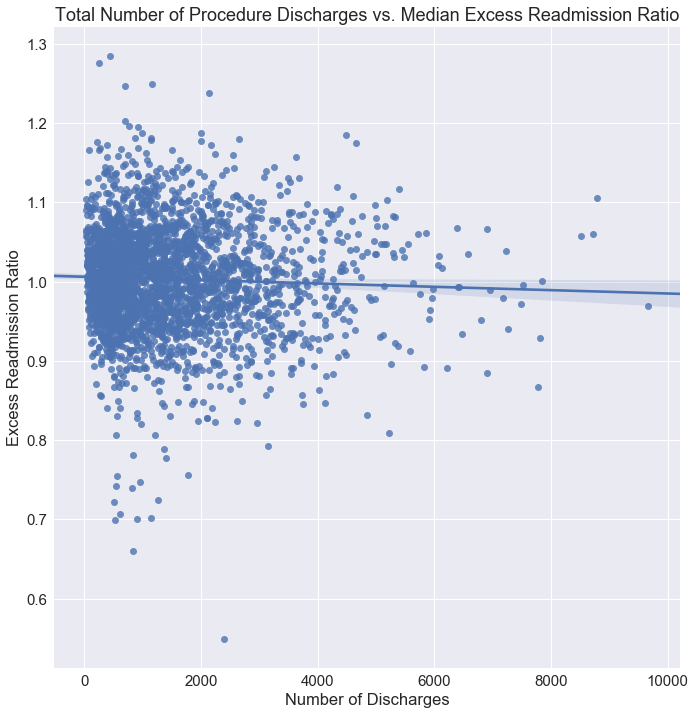

In [16]:
sns.set(font_scale = 1.5);

_ = sns.lmplot(x= 'Number of Discharges', y = 'Excess Readmission Ratio', data = clean_aggregated_rates, size=10)
_ = plt.title('Total Number of Procedure Discharges vs. Median Excess Readmission Ratio')

Let's check the distribution of the median excess readmission ratio. 

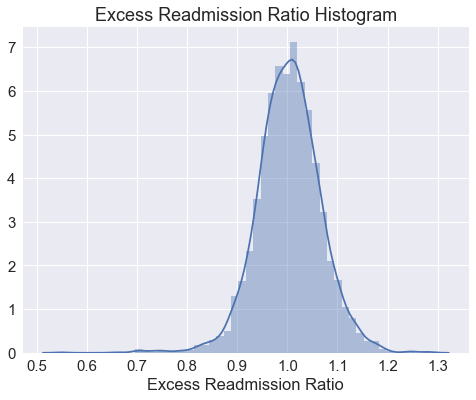

In [17]:
_ = plt.subplots(figsize=(8,6))
_ = plt.title('Excess Readmission Ratio Histogram')
_ = sns.distplot(clean_aggregated_rates['Excess Readmission Ratio'], hist=True)

We appear to have a slight long-tail distribution: a few hospitals and clinics in the sample seem to have outstanding excess readmission ratios. 

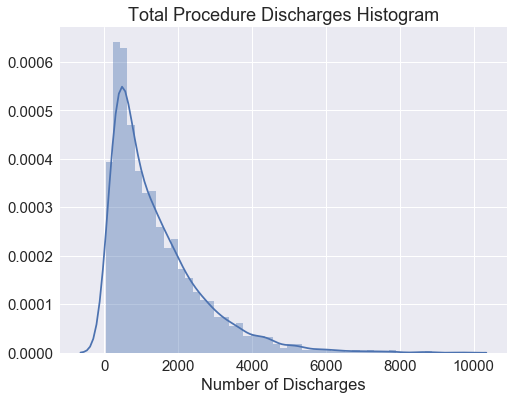

In [18]:
_ = plt.subplots(figsize=(8,6))
_ = plt.title('Total Procedure Discharges Histogram')
_ = sns.distplot(clean_aggregated_rates['Number of Discharges'], hist=True)

Because the number of discharges is clearly not normally distributed (we have a strong right skew), we can't look at the Pearson correlation coefficient. Thus we will look at the Spearman correlation coefficient. 

In [40]:
r_val, r_p_val = spearmanr(clean_aggregated_rates['Number of Discharges'], clean_aggregated_rates['Excess Readmission Ratio'])
print('Spearman R correlation coefficient: {}'.format(r_val))
print('Two_sided p-test value: {}'.format(r_p_val))

Spearman R correlation coefficient: -0.03814145195690453
Two_sided p-test value: 0.03699272140817943


The correlation coefficient indicates a minimal negative correlation between number of discharges and excess readmission ratio. 

The p-value here corresponds to a two-sided t-test, where the t-statistic is $t = r\sqrt{\frac{n-2}{1-r^2}}$, where $r$ is the Spearman correlation coefficient, and $n$ is the sample size. The statistic $t$ is approximately distributed as a Student-t distribution with $n-2$ degrees of freedom [(see here)][1].

Null hypothesis: the Spearman correlation coefficient is 0 (number of discharges and the excess readmission ratio are not correlated). 

Since the p-value is greater than alpha, we fail to reject the null hypothesis. 

[1]: https://en.wikipedia.org/wiki/Spearman%27s_rank_correlation_coefficient#Determining_significance

Note: if with the original assumption that each row represents a different hospital, we would have gotten a different result: 

In [62]:
spearmanr(no_outlier_df['Number of Discharges'], no_outlier_df['Excess Readmission Ratio'])

SpearmanrResult(correlation=-0.07685803723268629, pvalue=1.5672494791925574e-16)

In the interest of answering the exercises as intended, let's modify the critical value: $\alpha = .05$. Then, we would reject the null hypothesis and conclude that number of discharges and excess readmission ratio are negatively correlated. 

However, the correlation is slight. The value of the Spearman correlation coefficient is very close to 0. If we look at the linear model, we also see how slight the real effect is:

In [33]:
from scipy.stats import linregress

slope, intercept, reg_r_val, reg_p_val, reg_std = linregress(clean_aggregated_rates['Number of Discharges'], clean_aggregated_rates['Excess Readmission Ratio'])

print('Excess Readmission Ratio = {}*Number of Discharges + {}'.format(slope, intercept))

Excess Readmission Ratio = -2.1146331483893857e-06*Number of Discharges + 1.0060957577290186


In [34]:
slope*1000

-0.0021146331483893857

In [35]:
clean_aggregated_rates['Number of Discharges'].describe()

count    2991.000000
mean     1400.007355
std      1244.621262
min        29.000000
25%       490.000000
50%      1030.000000
75%      1918.000000
max      9666.000000
Name: Number of Discharges, dtype: float64

According to the model, increasing the number of discharges for the studied procedures at a given hospital by 1000 would only result in a reduction of 0.002 of the excess readmission ratio. Increasing discharges by this amount is highly nontrivial, and the improvement is slight. I do not believe that policy changes that encourage consolidation of hospitals are justified by this analysis. 

In other words, the negative correlation observed between the number of discharges and excess readmission ratio is *statistically significant*, but NOT *practically significant*.

5. What are the advantages and disadvantages of the above scatterplot? 

The scatterplot gives a good overview of the data. One thing that's missing in the original case is the visualization of the regression model. Seeing the fit of the line could provide a bit more insight. Here's that modification

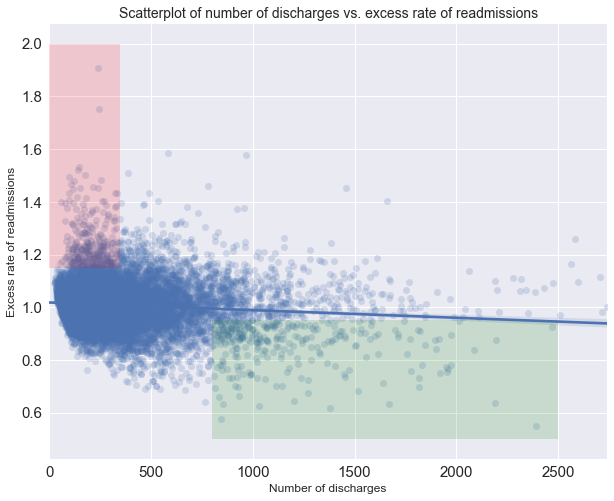

In [24]:
fig, ax = plt.subplots(figsize=(10,8))

_ = sns.regplot(x = 'Number of Discharges', y= 'Excess Readmission Ratio', data = clean_hospital_read_df, ax = ax, scatter_kws = {'alpha':.2})
ax.fill_between([0,350], 1.15, 2, facecolor='red', alpha = .15, interpolate=True)
ax.fill_between([800,2500], .5, .95, facecolor='green', alpha = .15, interpolate=True)

_ = ax.set_xlim([0, max(x)])
_ = ax.set_xlabel('Number of discharges', fontsize=12)
_ = ax.set_ylabel('Excess rate of readmissions', fontsize=12)
_ = ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)

As already discussed, the original analysis misses the fact that the rows of the dataframe don't necessarily correspond to different hospitals. Interestingly, if we segment the dataset by the variable Measure Name, problems with this assumption would have been more evident. 

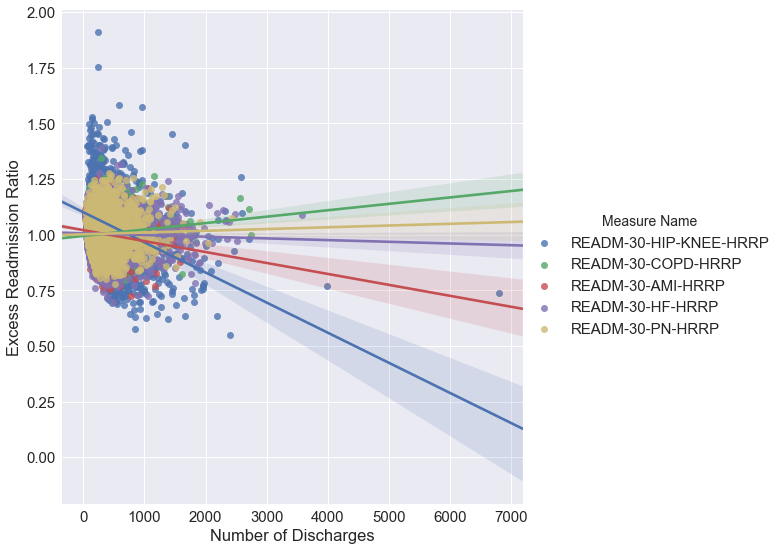

In [25]:
_ = sns.lmplot(x = 'Number of Discharges', y= 'Excess Readmission Ratio', data = clean_hospital_read_df, size=8, hue = 'Measure Name')

The correlation between the number of discharges and excess readmission ratio is strongly affected by the "Measure Name" variable. 

Interesting, it seems that excess readmission could be positively correlated with discharge number for diseases affecting the lungs (COPD, PN), whereas discharges related to heart disease (AMI, HF) and elective surgery of older individuals (HIP-KNEE) could be negatively correlated with number of discharges. 

The differences between the linear models for different readmission ratios could be used to provide measurement-specific guidelines.

EX: It is conceivable that hip and knee replacements could be provided at consolidated locations. 
High excess readmission ratio for AMI/HF admissions could be related to limited availability of emergency medical services at smaller hospitals and clinics. 